In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [3]:
ratings_df = pd.read_csv('data/title.ratings.tsv', sep='\t')

In [4]:
titles_df = pd.read_csv('data/title.basics.tsv', sep='\t')

In [5]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1465
1,tt0000002,6.4,176
2,tt0000003,6.6,1086
3,tt0000004,6.5,105
4,tt0000005,6.2,1791


In [6]:
titles_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
directors_df = pd.read_csv('data/title.crew.tsv', sep='\t')

In [8]:
directors_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [9]:
# Joining the titles and ratings dataframe based on title id
titles_df = titles_df.set_index('tconst').join(ratings_df.set_index('tconst'))

In [11]:
# Joining the new titles and directors/writers dataframe based on title id
titles_df = titles_df.join(directors_df.set_index('tconst'))

In [12]:
titles_df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
tconst,,,,,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1465.0,nm0005690,\N
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,176.0,nm0721526,\N
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1086.0,nm0721526,\N
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.5,105.0,nm0721526,\N
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1791.0,nm0005690,\N


In [13]:
titles_df.shape

(5637621, 12)

In [ ]:
# Storing movies with romantic genres
# na = False in contains method will prevent an indexing error generated by NaN values
romantic_df = titles_df[titles_df['genres'].str.contains("Romance", na=False)]
romantic_df.head()

In [ ]:
# Store this csv so it can be used in the other notebook
romantic_df.to_csv('data/romantic.csv', encoding='utf-8')

In [16]:
master_df = titles_df.dropna()
master_df.shape

(918927, 12)

In [25]:
master_df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
tconst,,,,,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1465.0,nm0005690,\N
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,176.0,nm0721526,\N
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1086.0,nm0721526,\N
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.5,105.0,nm0721526,\N
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1791.0,nm0005690,\N


In [28]:
# Using altair data server to prevent notebook size from getting too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

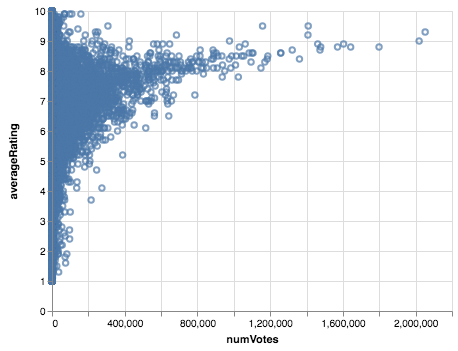

In [29]:
alt.Chart(master_df).mark_point().encode(
    alt.X('numVotes:Q'),
    alt.Y('averageRating:Q')
)

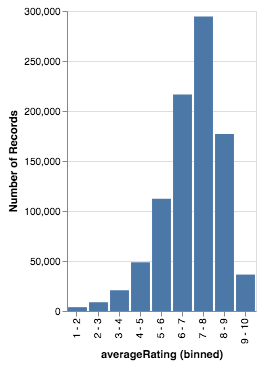

In [41]:
alt.Chart(master_df).mark_bar().encode(
    alt.X('averageRating:O', bin=alt.Bin(maxbins=10)),
    alt.Y('count()')
)

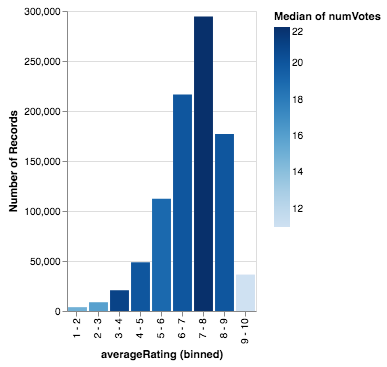

In [42]:
alt.Chart(master_df).mark_bar().encode(
    alt.X('averageRating:O', bin=alt.Bin(maxbins=10)),
    alt.Y('count()'),
    alt.Color('median(numVotes)')
)

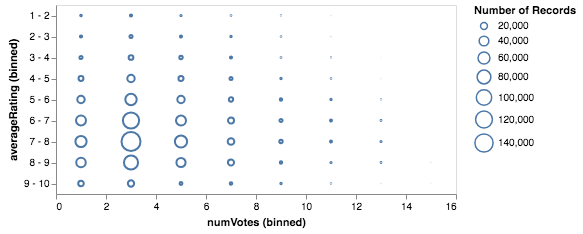

In [55]:
temp_df = master_df.copy()
temp_df['numVotes'] = np.log(temp_df['numVotes'].astype(float))
alt.Chart(temp_df).mark_point().encode(
    alt.X('numVotes:Q', bin=True),
    alt.Y('averageRating:O', bin=True),
    size='count()'
)